In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ECG_function import *
%matplotlib inline

# Whitebox Exploration : MLP with 12 features
## Data Importing

In [2]:
Xtrain,Ytrain,Xtest = DataImporting()
lable = Ytrain.TARGET.values

## FFT
We extract the max frequence of each channel, and we use this vector(dim12) to do the classification.

The reason is that we could explain this vector with its physic background.

Because of the reduction of the dimension of the data, we are able to use more complicated classifier to do the classification.

In [176]:
from scipy.fftpack import dct, idct
#a = list(dct(DataSample(Xtrain,1,12).values, norm='ortho'))+list(dct(DataSample(Xtrain,1,11).values, norm='ortho'))
AllFeatures_fft =[[[] for k in range(12)   ] for i in range(1000)]
AllFeatures_fft_car =[[[] for k in range(12)   ] for i in range(1000)]
for id in range(1000):
    for k in range(12):
        AllFeatures_fft[id][k] = list(dct(DataSample(Xtrain,id,k+1).values, norm='ortho'))[30:]
        abs_max = np.argmax(np.abs(AllFeatures_fft[id][k]))
        #track the sign of each abs_max_component
#         if AllFeatures_fft[id][k][abs_max] >=0:
#             AllFeatures_fft_car[id][k] = 1
#         else :
#             AllFeatures_fft_car[id][k] = 0

        #track the value with sign of each abs_max_component
        AllFeatures_fft_car[id][k] = AllFeatures_fft[id][k][abs_max]
        

## Some graphic interpretation

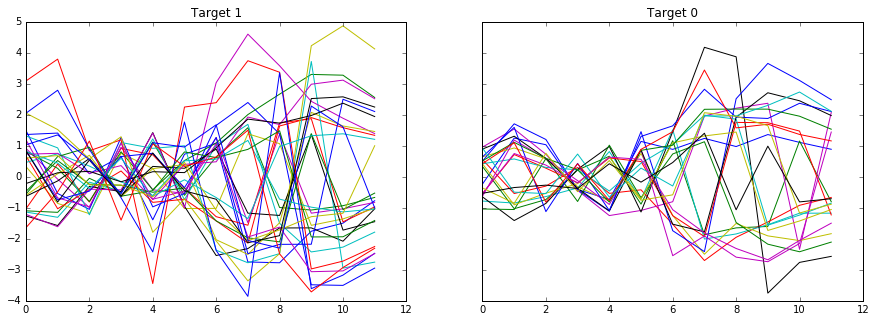

In [177]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharex='col', sharey='row')
fig.set_size_inches(15, 5)

for i in [i for i in range(50) if Ytrain.TARGET.values[i]==1]:
    ax1.plot(AllFeatures_fft_car[i])
    ax1.set_title('Target 1')
for i in [i for i in range(50) if Ytrain.TARGET.values[i]==0]:
    ax2.plot(AllFeatures_fft_car[i])
    ax2.set_title('Target 0') 

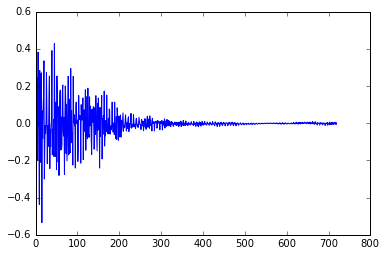

In [178]:
plt.plot(AllFeatures_fft[7][4])

## MLP with 12 features

In [179]:
SelectedFeatures = AllFeatures_fft_car
lable = Ytrain.TARGET.values
np.shape(SelectedFeatures)

(1000, 12)

In [182]:
from sklearn.ensemble import RandomForestClassifier
N_sep = len(lable)*2/3

RF = RandomForestClassifier(n_estimators=100)
RF.fit(SelectedFeatures[0:N_sep], lable[0:N_sep])
print RF.score(SelectedFeatures[N_sep:], lable[N_sep:])
feat_pred_rf = RF.predict(SelectedFeatures[N_sep:])

0.706586826347


In [191]:
from MyMLP import *
nn = NeuralNetwork([12,15,1], 'logistic')
c = 0
nn.fit(SelectedFeatures[0:N_sep], lable[0:N_sep],learning_rate=0.5)
for i in range(N_sep+1,1000):
    if lable[i] == int(nn.predict(SelectedFeatures[i])>0.5):
        c+=1
    #print nn.predict(SelectedFeatures[i])
print c/333.0        

0.513513513514


In [192]:
AllFeatures_fft_car[4]

[-0.23414803498675155,
 1.2487474584295435,
 1.0345716202409483,
 -0.41019788607932045,
 -0.73146164952867954,
 1.1416595300939818,
 0.88444952741746652,
 1.2392434093062787,
 0.97609254292368297,
 1.3625257937425934,
 1.110435748124976,
 0.88751197222258671]